<center><h1>Analyzing India's Suicide Rate from 2001 to 2012</h1></center>
-Fenil Gholani

<h2>Outline</h2>
<h3><ul>
    <li>Introduction
    <li>Data Collection
    <li>Data Pasrsing
    <li>Data Analysis & Visualization
    <li>Machine Learning
    <li>Conclusion
</h3>

<h2>Introduction</h2>
Many people commit succide in India and I wanted to understand the relationship between the number of suicide with state, gender and age from 2001 to 2012. 
<p>
Suicides is emerging as a serious Public Health issue in India. The suicide rate in India has been increasing since 2001. Of the total suicides, India alone accounts for 17%. This is crucial problem which India faces and the Government is trying to solve. These are some of the helplines:<br><br>
<strong>Kiran: 18005990019(24/7)</strong><br>
<strong>Aasra: 91-9820466726(24/7)</strong><br>
<strong>Vandrevala Foundation: 18602662345(24/7)</strong>
</p>
<p>
This project helps understand why people commit suicide and how to predict it with the Machine learning algorithm. In this project we will explore what factors actually affect or lead to suicides in India.
</p>
<center><img src="https://i1.wp.com/freebird.org.in/wp-content/uploads/2020/03/3-idiots-4.png?w=960&ssl=1"/><br>3 Idiots Movie</center>


In [1]:
import matplotlib as mp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from yellowbrick.regressor import ResidualsPlot
import seaborn as sns

<h2>Data Collection</h2>
The first step is to load the data as a pandas dataframe. I downloaded the data from the provided website below and loaded the csv file as pandas dataframe.<br><br>

Dataset can be downloaded from:<a href="https://www.kaggle.com/rajanand/suicides-in-india"> https://www.kaggle.com/rajanand/suicides-in-india</a>
<br><br>
National Crime Records Bureau (NCRB), Govt of India has shared this dataset: <a href="https://data.gov.in/dataset-group-name/accidental-deaths-and-suicides">https://data.gov.in/dataset-group-name/accidental-deaths-and-suicides</a>
Open Data License - India.



In [2]:
# Reading the data from Suicides.csv
data = pd.read_csv("Suicides.csv")

<h2> Data Parsing</h2>

<p>In this step we needed to clean the data and remove some irrevant data from the dataframe. These are modifications made to the dataframe:
<ul>
    <li>Removal of data with 'Total' == 0 (suicide in that state at that year), since the data is redundant and doesn't contribute to the total suicides in the state.
    <li>Cleaning the data of certain abbreviations such as  'A & N Islands' to 'Andaman and Nicobar Islands'.
    <li>Setting up code for non numeric data in order to create a machine learning model and understand their relationship.
    <li>Removal of data with '0-100+' as it doesn't help in understanding the relationship between age and the number of suicides.
</ul>
</p>

In [3]:
# The total death is 0 
data = data[data['Total'] != 0]

#Removing cumulative data of States and Union Territory
data = data[data['State'] != 'Total (All India)']
data = data[data['State'] != 'Total (States)']
data = data[data['State'] != 'Total (Uts)']

In [4]:
# Renaming the States
data['State'] = data['State'].apply(lambda x: "Andaman and Nicobar Islands" if x == 'A & N Islands' else x)
data['State'] = data['State'].apply(lambda x: "Delhi" if x == 'Delhi (Ut)' else x)

In [5]:
# Generating codes to help in Predicting
data['Gender_code'] = data['Gender'].apply(lambda x: 1 if x == "Male" else 0)
data['Age_group_code'] = data['Age_group'].apply(lambda x: 0 if(x== '0-14') else (1 if(x == '60+') else( 2 if(x == '45-59') else( 3 if(x == '30-44') else 4 ))))

In [6]:
# data1 is a copy of actual data as it stores data necessary for Eduction based suicide which has a generalized age of '0-100+'
data1 = data.copy()
data = data[data['Age_group'] != '0-100+']

In [7]:
data.head()

,State,Year,Type_code,Type,Gender,Age_group,Total,Gender_code,Age_group_code
13,Andaman and Nicobar Islands,2001,Causes,Love Affairs,Female,0-14,1,0,0
20,Andaman and Nicobar Islands,2001,Causes,Other Causes (Please Specity),Female,0-14,1,0,0
32,Andaman and Nicobar Islands,2001,Causes,Other Prolonged Illness,Male,0-14,1,1,0
47,Andaman and Nicobar Islands,2001,Causes,Failure in Examination,Male,0-14,1,1,0
54,Andaman and Nicobar Islands,2001,Causes,Other Prolonged Illness,Female,15-29,8,0,4


<h2>Data Analysis & Visualization</h2>
<p>After processing the data, in this step we try understand what some of the possible correlation between the number of suicide with age, sex and state. In this stage I try to experiment with certain variables of the dataframe to get a better understanding about what are some variables that can be correlated with total suicides in India.
</p>

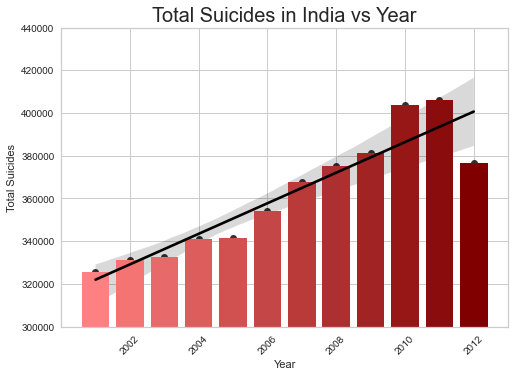

In [8]:
# Representing the Number of Suicide per Year in India
india_total = data.groupby('Year',as_index= False).sum()

fig, ax = plt.subplots()
# For color gradient in the bar graph
likeability_scores = np.array(india_total['Year'])
data_normalizer = mp.colors.Normalize()
color_map = mp.colors.LinearSegmentedColormap("my_map",
{"red": [(0, 1.0, 1.0), (1.0, .5, .5)],
    "green": [(0, 0.5, 0.5),(1.0, 0, 0)],
    "blue": [(0, 0.50, 0.5),(1.0, 0, 0)]})

# Representing the bar graph of the number of suicide per year with a linear regression line
plt.bar(x=india_total['Year'], height=india_total['Total'], color=color_map(data_normalizer(likeability_scores)))
sns.regplot(x=india_total['Year'], y=india_total['Total'], ax=ax, color = 'black')
plt.title('Total Suicides in India vs Year', fontsize=20)
t = plt.xticks(rotation=45)
plt.ylabel('Total Suicides')
plt.ylim([300000, 440000])
plt.show()

From the plot above, we see that the numbers of suicides in India have been increasing over time. There is fall in the number of suicides in 2012 however, the overall trend is increaing.

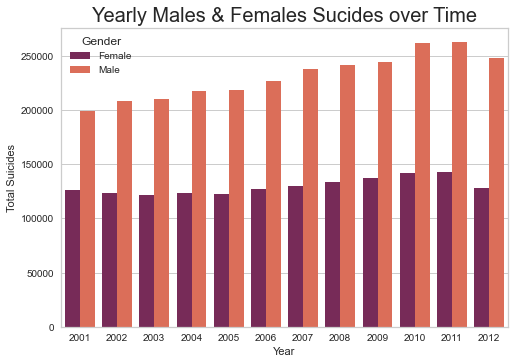

In [9]:
# Ploting the Male and Female Suicide per year
gender_wise = data[['Year', 'Gender','Total']].groupby(['Year', 'Gender']).sum()
gender_wise.reset_index(inplace = True)
plt.title('Yearly Males & Females Sucides over Time', fontsize=20)
# plt.rcParams['figure.figsize'] = [15, 15]
ax = sns.barplot(x = 'Year', y = 'Total', hue = 'Gender', data = gender_wise, palette='rocket')
plt.ylabel('Total Suicides')
plt.show()

From the above plot, we can see that number of males who commited suicide is relatively higher than female.

In [10]:
# The data shows the resaons for t
reasons_set = data1.copy()
reasons_set = reasons_set[['Type_code', 'Total']].groupby('Type_code', as_index=False).sum()
reasons_set

,Type_code,Total
0,Causes,1440974
1,Education_Status,1455931
2,Means_adopted,1455931
3,Professional_Profile,1439243
4,Social_Status,1455931


From the above table we can see some of the major categories of why people commit suicide in India.

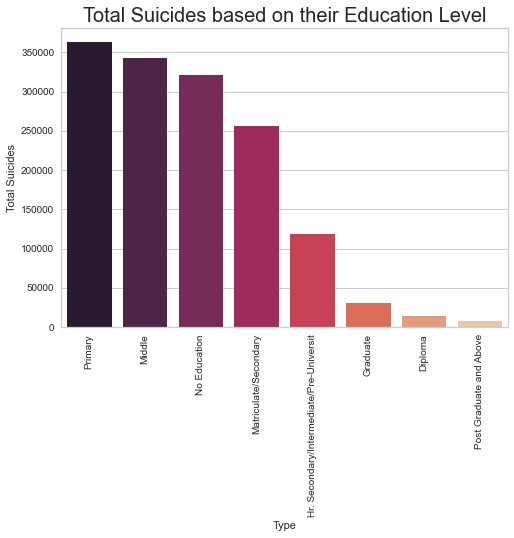

In [11]:
# Plot to understand the education based suicides
education_suicide = data1[data1['Type_code'] == 'Education_Status']
education_suicide = education_suicide.groupby('Type', as_index=False).sum()
education_suicide.sort_values(by='Total', axis=0, ascending=False, inplace=True)
sns.barplot(x='Type', y='Total', data=education_suicide, palette='rocket')
plt.title('Total Suicides based on their Education Level', fontsize=20)
plt.rcParams['figure.figsize'] = [10, 10]
plt.ylabel('Total Suicides')
t= plt.xticks(rotation=90)


From the above graph we can see that more than 350,000 people commit suicide in Primary school. The suicide number of Primary, Middle and No Education align close to each other. Which raises some questions on the education system of India and the stressful environment.

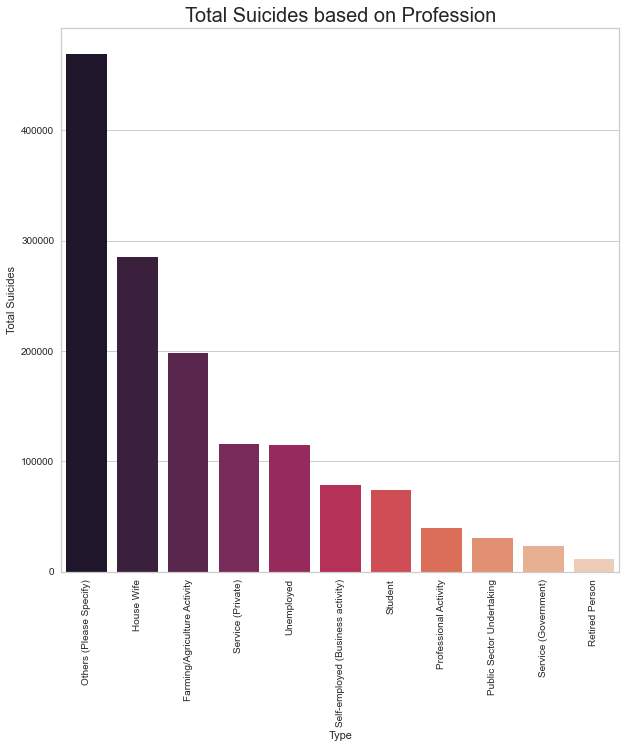

In [12]:
# Plot to understand the education based suicides 
prof_suicide = data[data['Type_code'] == 'Professional_Profile']
prof_suicide = prof_suicide.groupby('Type', as_index=False).sum()
prof_suicide.sort_values(by='Total', axis=0, ascending=False, inplace=True)
sns.barplot(x='Type', y='Total', data=prof_suicide, palette='rocket')
plt.title('Total Suicides based on Profession', fontsize=20)
plt.rcParams['figure.figsize'] = [10, 10]
plt.ylabel('Total Suicides')
t= plt.xticks(rotation=90)

From the above graph we cannot denote 'other', however it is followed by House Wife and then Farming. Which denotes the stress House wives and Farmers have in India.

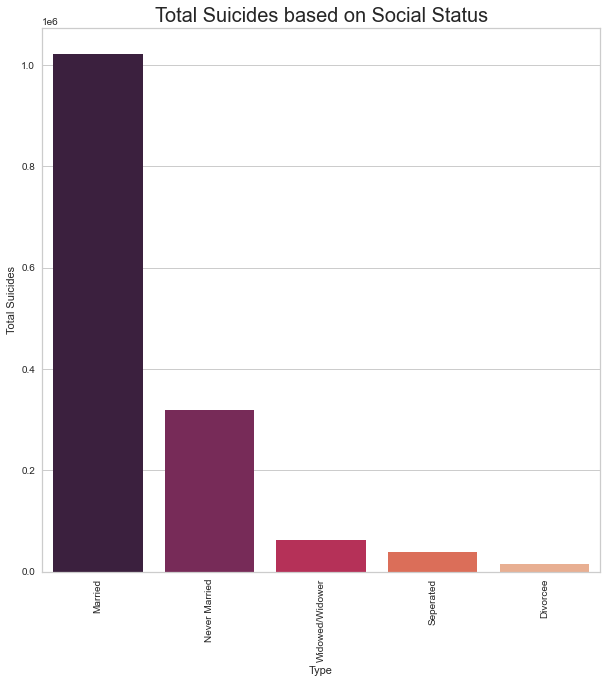

In [13]:
# Plot to understand the Social Status based suicides 
soc_suicide = data1[data1['Type_code'] == 'Social_Status']
soc_suicide = soc_suicide.groupby('Type', as_index=False).sum()
soc_suicide.sort_values(by='Total', axis=0, ascending=False, inplace=True)
sns.barplot(x='Type', y='Total', data=soc_suicide, palette='rocket')
plt.title('Total Suicides based on Social Status', fontsize=20)
plt.rcParams['figure.figsize'] = [10, 10]
plt.ylabel('Total Suicides')
t= plt.xticks(rotation=90)

From the above graph we can see that there are many suicides based of Marriage.

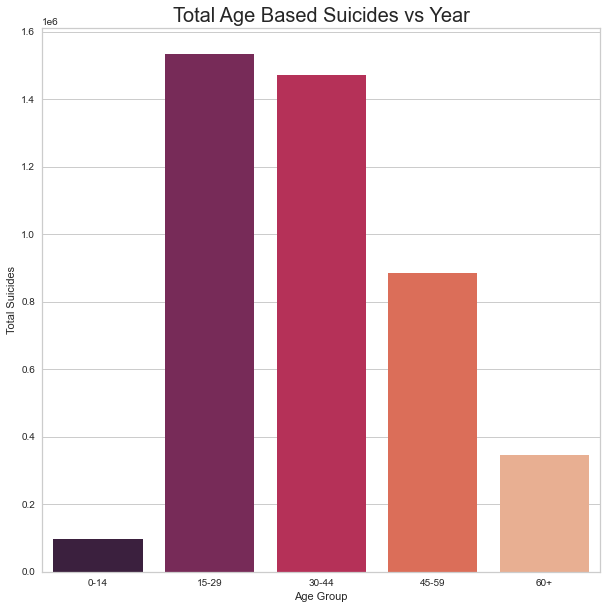

In [14]:
# Plot to understand the age based suicides
age_suicide = data.copy()
age_suicide = age_suicide[age_suicide['Age_group'] != '0-100+']
age_suicide = age_suicide.groupby('Age_group', as_index=False).sum()
sns.barplot(x='Age_group', y='Total', data=age_suicide, palette='rocket')
plt.title('Total Age Based Suicides vs Year', fontsize=20)
plt.ylabel('Total Suicides')
plt.xlabel('Age Group')
plt.show()

From the bar plot we can denote that ages between 15-29 are susceptible to commit suicide more than 0-14 or 60+.

C:\Users\fghol\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


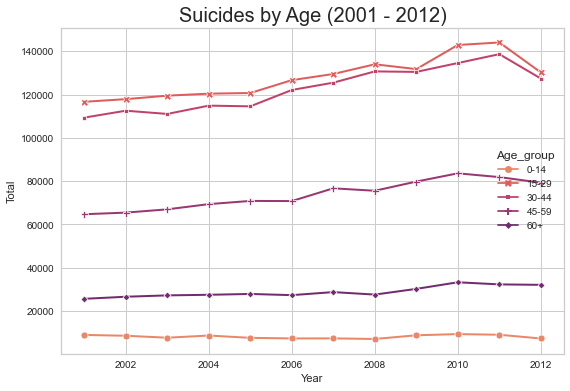

In [15]:
# Plotting age group suicide over timw
df_age = data.groupby(["Year","Age_group"], as_index=False)["Total"].sum()
plt.figure(figsize=(9,6))
plt.title('Suicides by Age (2001 - 2012)', fontsize=20)
sns.lineplot("Year", "Total", hue = "Age_group", data = df_age, linewidth = 2, style = "Age_group",markers=True, dashes=False, palette='flare')
plt.show()

From the plot we can see that the number of suicides are not decreasing at individual age group levels. 

In [16]:
# These are some of the major reasons or causes of suicide in India
reasons_set = data[data['Type_code'] == 'Causes']
reasons_set['Type'].value_counts()

Causes Not known                                  3332
Other Causes (Please Specity)                     3065
Family Problems                                   3013
Other Prolonged Illness                           2680
Insanity/Mental Illness                           2572
Love Affairs                                      1697
Poverty                                           1568
Death of Dear Person                              1511
Fall in Social Reputation                         1496
Suspected/Illicit Relation                        1420
Drug Abuse/Addiction                              1406
Unemployment                                      1404
Property Dispute                                  1393
Failure in Examination                            1379
Bankruptcy or Sudden change in Economic           1373
Cancer                                            1233
Professional/Career Problem                       1160
Cancellation/Non-Settlement of Marriage           1116
Paralysis 

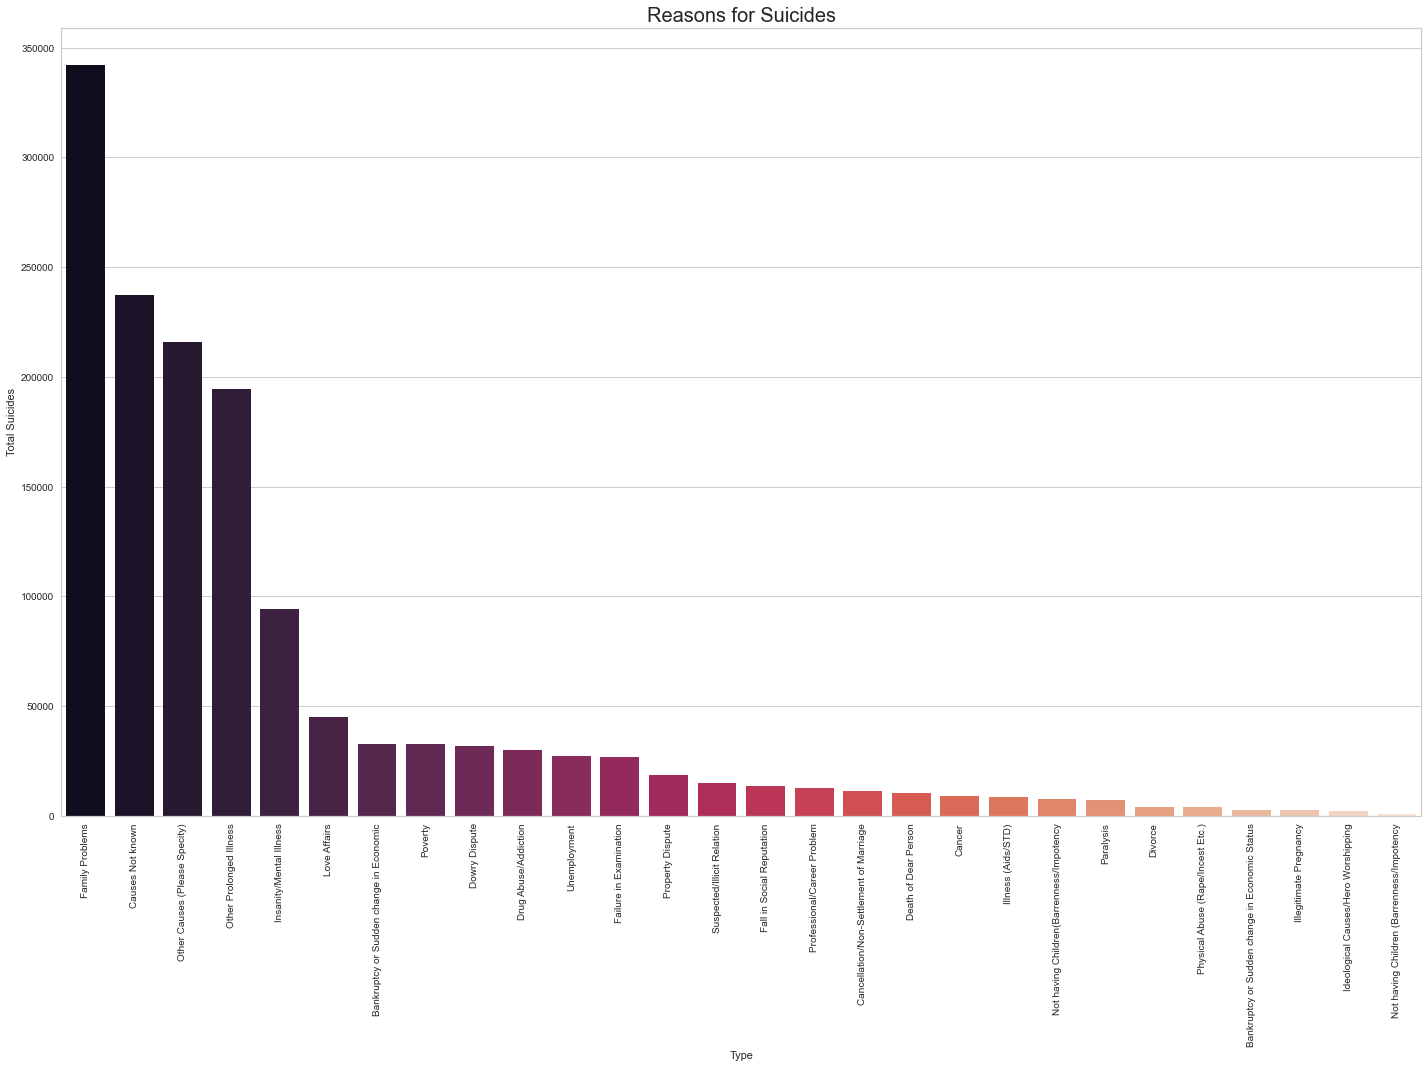

In [17]:
# Plot of Reasons for Suicides
set1 = reasons_set[['Type','Total']].groupby('Type', as_index = False).sum()
set1 = set1.sort_values('Total', ascending = False)
plt.figure(figsize= (20,15)) # Make a plot size
g = sns.barplot(x = set1['Type'], y = set1['Total'], data = set1, orient = 'v', palette='rocket')
plt.title('Reasons for Suicides', fontsize=20)    
plt.xticks(rotation = 90)
plt.ylabel('Total Suicides')
plt.tight_layout()
plt.show()

From the we can denote that Family problems are the major reasons for suicide

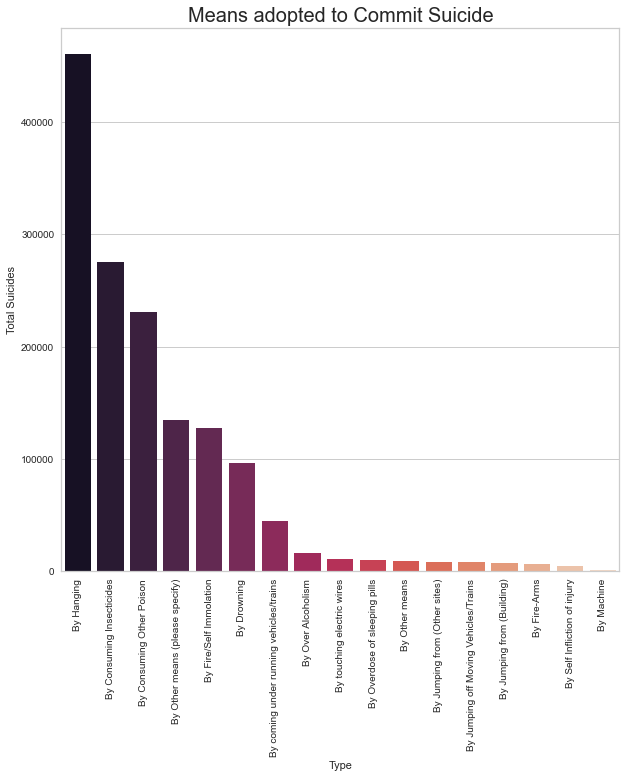

In [18]:
# Plot to understand the means adopted to commit suicide
meanof_suicide = data[data['Type_code'] == 'Means_adopted']
meanof_suicide = meanof_suicide.groupby('Type', as_index=False).sum()
meanof_suicide.sort_values(by='Total', axis=0, ascending=False, inplace=True)
sns.barplot(x='Type', y='Total', data=meanof_suicide, palette='rocket')
plt.title('Means adopted to Commit Suicide', fontsize=20)
plt.ylabel('Total Suicides')
t= plt.xticks(rotation=90)

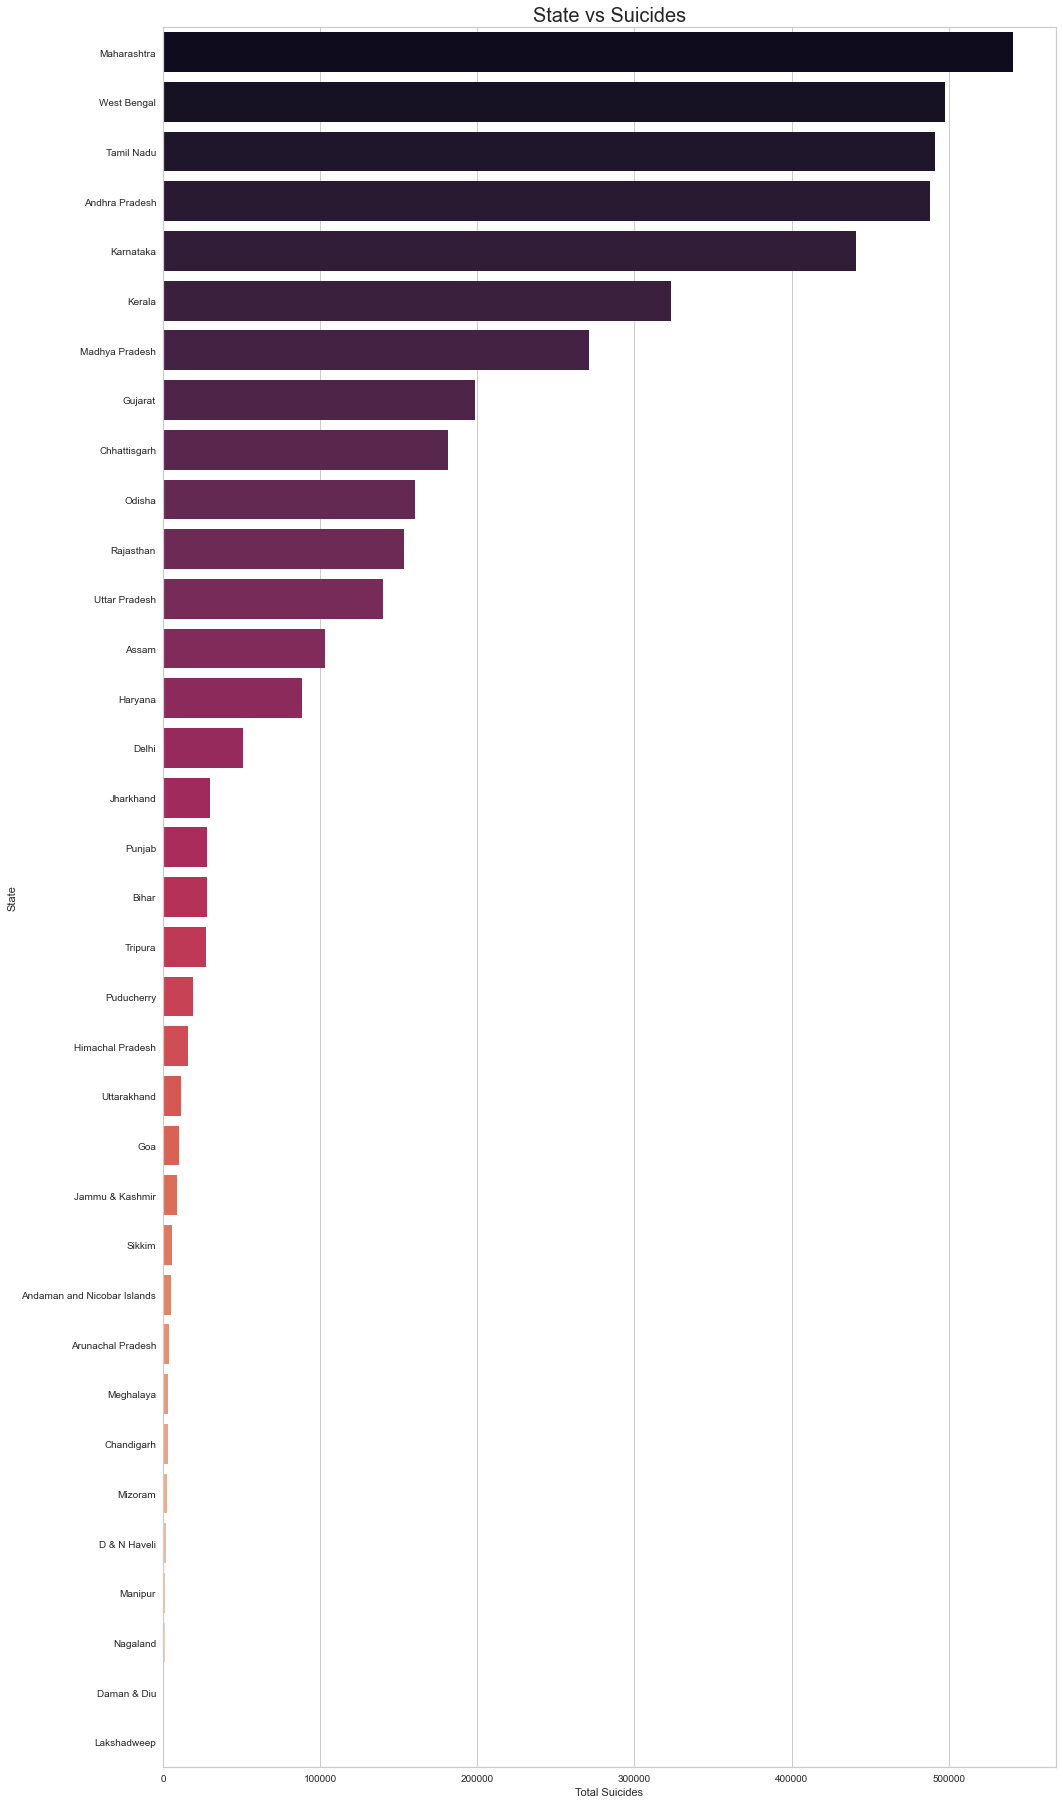

In [19]:
# Plot to understand the state based suicides
state_suicide = data.copy()
state_suicide = state_suicide[['State', 'Total']]
state_suicide = state_suicide.groupby('State', as_index=False).sum().sort_values('Total', ascending = False)
state = list(state_suicide['State'])
plt.figure(figsize=(16,32))
sns.barplot(y='State', x='Total', data=state_suicide, palette='rocket')
plt.title('State vs Suicides', fontsize=20)
plt.xlabel('Total Suicides')
plt.show()

In [20]:
# Storing the descending order of states and creating codes for setting up correlations and machine learning
state = state[::-1]
state_code = {k: v for v, k in enumerate(state)}
data['State_code'] = data['State'].apply(lambda x: state_code[x])

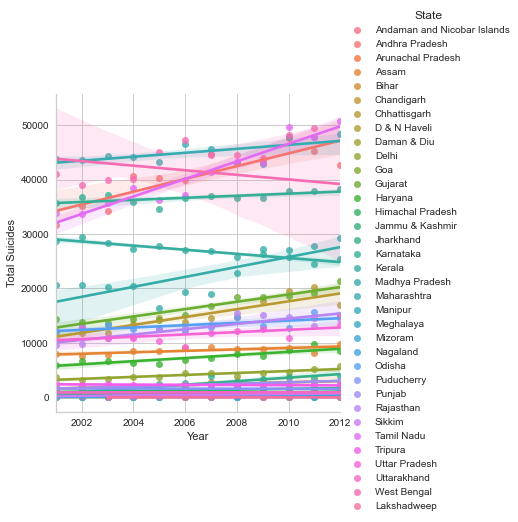

In [21]:
# Plot signifying individual states suicide rate over time
state_wise = data[['Year', 'State','Total']].groupby(['Year', 'State'], as_index=False).sum()
p = sns.lmplot(x="Year", y="Total", hue="State", data=state_wise)
plt.ylabel('Total Suicides')
plt.show()

As shown in the plot, most of states in India show an increasing trend of suicide numbers with Tamil Nadu have a steep slope while Maharashtra having the largest number of people commiting suicide.

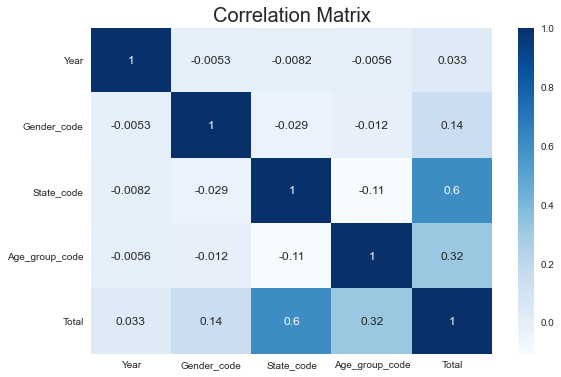

In [22]:
# Understanding the variables that are correlated with Total Suicides
df = data.groupby(['Year', 'Gender_code','State_code', 'Age_group_code'], as_index=False).sum()
plt.figure(figsize=(9,6))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.title('Correlation Matrix', fontsize=20)
plt.show()

The correlation matrix helps understand the relation between the individual variables.

<h2>Machine Learning</h2>
<p>
Now that we have visualized the data to help us understand how committing suicide is related to the age, sex and state. Since we understood the above heatmap, we hve stronger understanding of the correlation between the individual variables. In this stage I have built a machine learning model which comprise our training set and a testing set to determine how accurate the model is and which model to use.
</p>

In [23]:
#Created code for non numeric data which contribute to the suicide rate
y = df['Total']
X = df[['Year', 'Gender_code', 'State_code', 'Age_group_code']]
X.shape, y.shape

((3783, 4), (3783,))

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((3026, 4), (757, 4))

In [25]:
from sklearn.metrics import mean_squared_error
# LinearRegression model
lr = LinearRegression()
# fit the model 
lr.fit(X_train, y_train)

#predicting the target value from the model for the samples
y_test_lr = lr.predict(X_test)
y_train_lr = lr.predict(X_train)

#accuracy of the model performance
acc_train_lr = lr.score(X_train, y_train)
acc_test_lr = lr.score(X_test, y_test)

#root mean squared error (RMSE)
rmse_train_lr = np.sqrt(mean_squared_error(y_train, y_train_lr))
rmse_test_lr = np.sqrt(mean_squared_error(y_test, y_test_lr))

print('Linear Regression: Accuracy on training Data: ',acc_train_lr)
print('Linear Regression: Accuracy on test Data: ',acc_test_lr)
print('\nLinear Regression: The RMSE of the training: ', rmse_train_lr)
print('Linear Regression: The RMSE of the testing: ', rmse_test_lr)


Linear Regression: Accuracy on training Data:  0.5496129347930752
Linear Regression: Accuracy on test Data:  0.5153634478499206

Linear Regression: The RMSE of the training:  1419.3100257101362
Linear Regression: The RMSE of the testing:  1330.0505251931518


0.5496129347930752

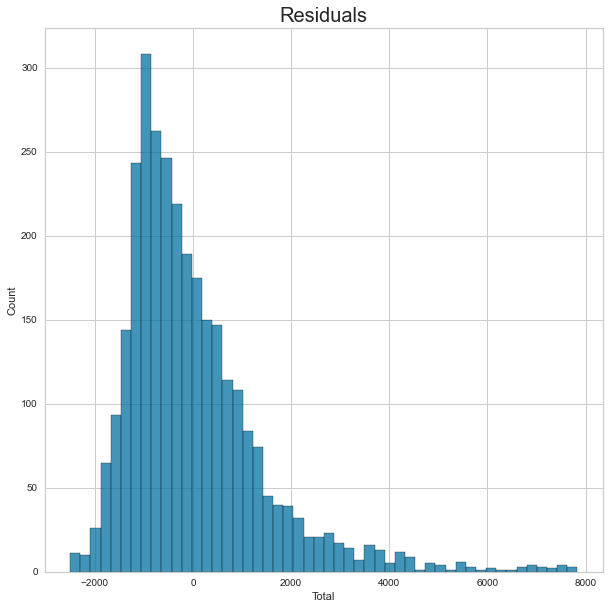

In [26]:
y_hat = lr.predict(X_train)
sns.histplot(y_train - y_hat)
plt.title("Residuals", size=20)
lr.score(X_train,y_train)

In [27]:
from sklearn.tree import DecisionTreeRegressor

# instantiate the model 
tree = DecisionTreeRegressor(max_depth=9)
# fit the model 
tree.fit(X_train, y_train)

#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

#computing the accuracy of the model performance
acc_train_tree = tree.score(X_train, y_train)
acc_test_tree = tree.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_tree = np.sqrt(mean_squared_error(y_train, y_train_tree))
rmse_test_tree = np.sqrt(mean_squared_error(y_test, y_test_tree))

print('Decision Tree: Accuracy on training Data: ',acc_train_tree)
print('Decision Tree: Accuracy on test Data: ',acc_test_tree)
print('\nDecision Tree: The RMSE of the training: ', rmse_train_tree)
print('Decision Tree: The RMSE of the testing: ', rmse_test_tree)

Decision Tree: Accuracy on training Data:  0.9886695466930985
Decision Tree: Accuracy on test Data:  0.9696932126084244

Decision Tree: The RMSE of the training:  225.11682686929655
Decision Tree: The RMSE of the testing:  332.60594460513045


0.9886695466930985

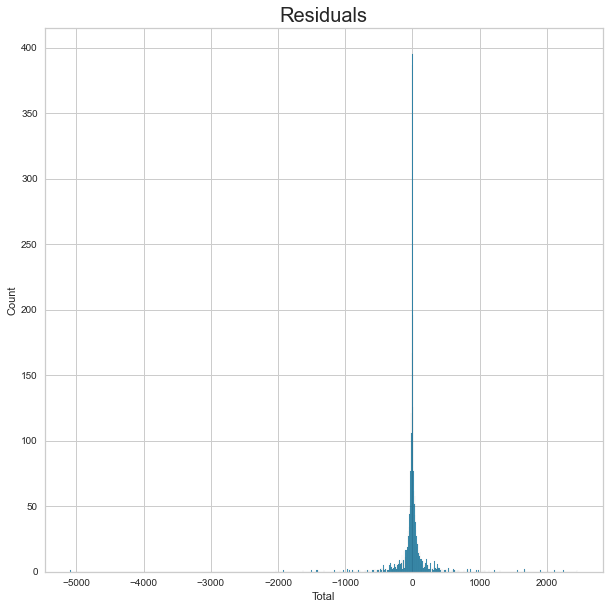

In [28]:
y_hat = tree.predict(X_train)
sns.histplot(y_train - y_hat)
plt.title("Residuals", size=20)
tree.score(X_train,y_train)

The accuracy on trainning data and testing Data are as low as 0.5 (50%)for linear regression. Therefore, Linear Regression is not a good model for it. We see that the accuracy scores of the training and testing set are very close which means that we underfitting and not overfitting it. Hence I moved to Decision tree which learns from if-else conditions and tries to find the most important variables and accordingly makes prediction. As we can see the accuracy rate of decision is very close to 0.98 (98%). Hence Decision tree is a great model for it.

<h2>Conclusion</h2>
<p>
These are some of the conclusion from the above project:
<ul>
<li>The suicide rate has sky rocketed from 2002-2010 but since 2011 it has been decreasing however the data till 2012 we can't confim the pattern. The overall trend is inreasing over time.
<li>The age group between 15-44 has the highest number of suicides and there are varioud reason which may align with it.
<li>The major reasons for the age group of 15-44 to commit suicide are Family Problems, Illness, Mental Illness, however some of the reasons are still unknown.
<li>Under social states, married is at the top when it comes to social status while never married is at second.
<li>Most of the professional profile is unknown but house wife comes in second, while Farming comes in at third.
<li>The majors ways suicide are commited are by Hanging, Consuming Insecticides .
<li>The states which record the highest suicides are Maharashtra, West Bengal and Tamil Nadu.
</ul
</p>